In [1]:
%matplotlib notebook

In [2]:
import functions
import plot_handler

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
field_names = [
                'time', # 0
                'T_in', 'T_out',   #1,2
                'P_in', 'P_out',  #3,5
                'Hum_in', 'Hum_out',   #7,8
                'T_Pump','T_SB',   #9,10
                'Altitude',   #13
                'O3_AE_a', 'O3_WE_a',   #14,15
                'O3_AE_b', 'O3_WE_b',   #16,17
                'CO2_V1_a', 'CO2_V2_a',   #18,19
                'CO2_V1_b', 'CO2_V2_b',   #20,21
                'valve_1', 'valve_2'   #31,32
               ]
cols_to_use = [0,1,2,3,5,7,8,9,10,13,14,15,16,17,18,19,20,21,31,32]

PATH = '../real_data_csv.csv'

# ECO-WISE Plots

In [5]:
df_asc = pd.read_csv(PATH,
                        names = field_names,
                        header = 0,
                        usecols = cols_to_use)

df_asc['time'] = df_asc.apply(lambda x : pd.Timestamp(x['time']//1000, unit = 's'), axis = 1)

#print(df_asc.loc[14022,'time'])
#print(df_asc.head(50))

## Plots refreshed by clicking

In [ ]:
humidity_plot = plot_handler.humidity_plot(df_asc.loc[:14022,['time','Hum_in','Hum_out']])

In [ ]:
temp_out_plot = plot_handler.temp_press_out_plot(df_asc.loc[:14022,['T_out','P_out','Altitude']])

<IPython.core.display.Javascript object>


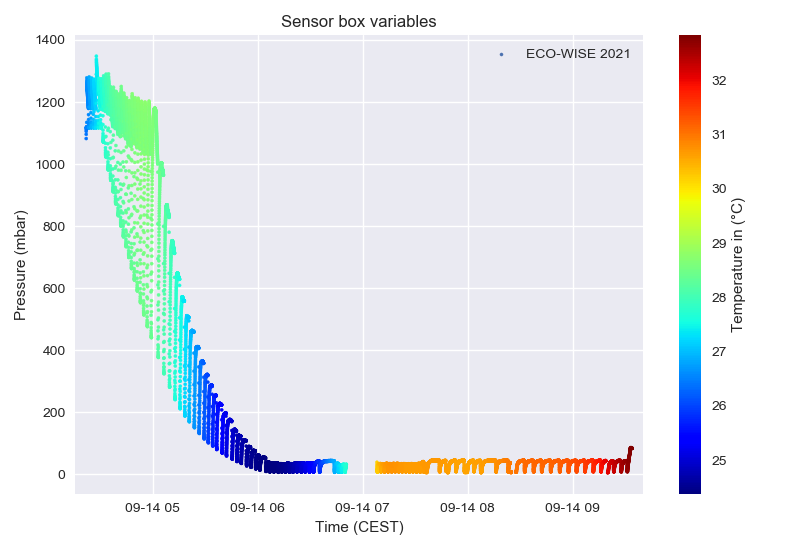

In [7]:
temp_in_plot = plot_handler.temp_press_in_plot(df_asc.loc[:14022,['T_in','P_in','time']])

In [ ]:
altitude_plot = plot_handler.altitude_time(df_asc.loc[:14022,['time','Altitude','T_out']])

In [ ]:
sb_and_pump_temp_plot = plot_handler.sb_pump_time(df_asc.loc[:14022,['time','T_Pump','T_SB']])

In [ ]:
df_asc['O3_ppm_a'] = df_asc['O3_ppm_b'] = None
df_asc['O3_ppm_a'] = df_asc.apply(functions.O3ConcentrationA, axis=1)
df_asc['O3_ppm_b'] = df_asc.apply(functions.O3ConcentrationB, axis=1)

O3_plot = plot_handler.O3_conc(df_asc.loc[:,['O3_ppm_a','O3_ppm_b','Altitude']])

In [ ]:
new_df = functions.preConc(df_asc)

CO2_plot = plot_handler.CO2_conc(new_df.loc[:,['CO2_C_a','CO2_C_b','Altitude']])

## Plots automatically refreshed

The following plot is just for the ascending phase

In [ ]:
def flowplot(i):
    df_asc = pd.read_csv(PATH,
                         names = [
                             'time', # 0
                             'T_in', 'T_out',   #1,2
                             'P_in', 'P_out',  #3,5
                             'valve_1', 'valve_2'   #31,32
                         ],
                         header=0,
                         usecols=[0,1,2,3,5,31,32])
    
    df_asc['flags'] = df_asc.apply(lambda x: 1 if (x["valve_1"]==1 and x["valve_2"]==0) else 0, axis=1)
    df_asc['Flowrate'] = functions.flowrate(df_asc.mask(lambda x: x['flags']!=1))
    df_asc['time'] = df_asc.apply(lambda x : pd.Timestamp(x['time']//1000, unit = 's'), axis = 1)

    # print(df)
    flow_ax.cla()
    
    flow_ax.scatter(df_asc['time'], df_asc['Flowrate'], s=20, 
                marker= '.', label = "ECO-WISE 2021")
    
    flow_ax.set_title("Pump's flowrate")
    flow_ax.set_xlabel("Time (CEST)")
    flow_ax.set_ylabel("Flowrate (L/min)")
    flow_ax.legend()

flow_rate_figure, flow_ax = plt.subplots()

ani = FuncAnimation(flow_rate_figure, flowplot, interval=2000)

In [ ]:
def O3VoltToTime(i):
    df_asc = pd.read_csv(PATH,
                        names = [
                                    'time', # 0
                                    'O3_WE_a', 'O3_AE_a',   #14,15
                                    'O3_AE_b', 'O3_WE_b',   #16,17
                                ],
                         header=0,
                         usecols=[0,14,15,16,17])
    
    df_asc['time'] = df_asc.apply(lambda x : pd.Timestamp(x['time']//1000, unit = 's'), axis = 1)
    
    O3_ax_a.cla()
    
    O3_ax_a.scatter(df_asc['time'], df_asc['O3_WE_a'], s=20, c='#0000FF',
                marker= '.', label = "WE")
    O3_ax_a.scatter(df_asc['time'], df_asc['O3_AE_a'], s=20,  c='#FF0000',
                marker= '.', label = "AE")
    
    O3_ax_a.set_title("O3 Voltage in Sensor A")
    O3_ax_a.set_ylabel("Voltage (Volt)")
    O3_ax_a.legend()
    
    O3_ax_b.cla()
    
    O3_ax_b.scatter(df_asc['time'], df_asc['O3_WE_b'], s=20, c='#0000FF',
                marker= '.', label = "WE")
    O3_ax_b.scatter(df_asc['time'], df_asc['O3_AE_b'], s=20,  c='#FF0000',
                marker= '.', label = "AE")
    
    O3_ax_b.set_title("O3 Voltage in Sensor B")
    O3_ax_b.set_xlabel("Time (CEST)")
    O3_ax_b.set_ylabel("Voltage (Volt)")
    O3_ax_b.legend()

O3_figure, (O3_ax_a, O3_ax_b) =  plt.subplots(nrows=2, ncols=1, sharex=True)

anim = FuncAnimation(O3_figure, O3VoltToTime, interval=2000)

In [ ]:
def CO2VoltToTime(i):
    df_asc = pd.read_csv(PATH,
                        names = [
                                    'time', # 0
                                    'CO2_V1_a', 'CO2_V2_a',   #18,19
                                    'CO2_V1_b', 'CO2_V2_b',   #20,21
                                ],
                         header=0,
                         usecols=[0,18,19,20,21])
    
    df_asc['time'] = df_asc.apply(lambda x : pd.Timestamp(x['time']//1000, unit = 's'), axis = 1)
    
    CO2_ax_a.cla()
    
    CO2_ax_a.scatter(df_asc.loc[:60,'time'], df_asc.loc[:60,'CO2_V1_a'], s=20, c='#0000FF',
                marker= '.', label = "Reference")
    CO2_ax_a.scatter(df_asc.loc[:60,'time'], df_asc.loc[:60,'CO2_V2_a'], s=20,  c='#FF0000',
                marker= '.', label = "Voltage")
    
    CO2_ax_a.set_title("CO2 Voltage in Sensor A")
    CO2_ax_a.set_ylabel("Voltage (Volt)")
    CO2_ax_a.legend()
    
    CO2_ax_b.cla()
    
    CO2_ax_b.scatter(df_asc.loc[:60,'time'], df_asc.loc[:60,'CO2_V2_b'], s=20, c='#0000FF',
                marker= '.', label = "Reference")
    CO2_ax_b.scatter(df_asc.loc[:60,'time'], df_asc.loc[:60,'CO2_V1_b'], s=20,  c='#FF0000',
                marker= '.', label = "Voltage")
    
    CO2_ax_b.set_title("CO2 Voltage in Sensor B")
    CO2_ax_b.set_xlabel("Time (CEST)")
    CO2_ax_b.set_ylabel("Voltage (Volt)")
    CO2_ax_b.legend()

CO2_figure, (CO2_ax_a, CO2_ax_b) =  plt.subplots(nrows=2, ncols=1, sharex=True)

anim = FuncAnimation(CO2_figure, CO2VoltToTime, interval=2000)